The goal of this notebook is to test that 
- when birthing an event from correlations, we can propose appropriate arrival times for newly associated uatemplates
- when killing an event with the correlation move, we can repropose the original uatemplates

The test case is from an openworld run on one hour of test data from the Wells aftershock validation set, in which I successfully proposed three events but missed a fourth.

In [8]:
import numpy as np

import os, sys, traceback
import cPickle as pickle

%matplotlib inline
import matplotlib.pylab as plt

from sigvisa.source.event import get_event, Event
from sigvisa.infer.event_birthdeath import ev_template_birth_helper, ev_template_death_helper, ev_bare_death_move
from sigvisa.models.ttime import tt_predict

In [9]:
with open("/home/dmoore/python/sigvisa/notebooks/thesis/corr_uatemplate_test.sg",  'rb') as f:
    sg = pickle.load(f)
sg.current_log_p_breakdown()

loading model 71214
loading model 71206
loading model 71198
loading model 71210
loading model 71202
loading model 71212
loading model 71204
loading model 71195
loading model 71208
loading model 71200
loading model 71211
loading model 71203
loading model 70978
loading model 71207
loading model 71199
loading model 71213
loading model 71205
loading model 71197
loading model 71209
loading model 71201
loading model 71214
loading model 71206
loading model 71198
loading model 71210
loading model 71202
loading model 71212
loading model 71204
loading model 71195
loading model 71208
loading model 71200
loading model 71211
loading model 71203
loading model 70978
loading model 71207
loading model 71199
loading model 71213
loading model 71205
loading model 71197
loading model 71209
loading model 71201
loading model 71214
loading model 71206
loading model 71198
loading model 71210
loading model 71202
loading model 71211
loading model 71203
loading model 70978
loading model 71207
loading model 71199


'n_uatemplate: -207.1\nn_event: -53.1\nev priors: ev -11.3\nev observations: ev 0.0\nphase existence: ev -0.0\ntt_residual: ev -26.5\nev global cost (n + priors + phases + tt): -90.9\ncoda_decay: ev -19.1 ua -26.8 total -46.0\npeak_decay: ev -31.0 ua -24.0 total -55.0\npeak_offset: ev -20.7 ua -33.6 total -54.3\ncoda_height: ev -20.3 ua -42.0 total -62.3\nmult_std_wiggle: ev 0.0 ua 0.0 total 0.0\ncoef jointgp: 0.0\ntotal param: ev -91.2 ua -126.4 total -217.6\npriors+params: ev -182.1 ua -333.5 total -515.6\nstation noise (observed signals): -226204.8\nnoise model prior lp: -9.0\noverall: -226729.4\nofficial: -226729.4\n'

plotting uatemplate -1313 as color (0.0, 0.33137254901960772, 1.0, 1.0)
plotting uatemplate -198 as color (0.0, 0.58235294117647063, 1.0, 1.0)
plotting uatemplate -1104 as color (0.0, 0.47254901960784312, 1.0, 1.0)
plotting uatemplate -348 as color (0.0, 0.0, 0.69607843137254899, 1.0)
plotting uatemplate -14 as color (0.24984187223276405, 1.0, 0.717900063251107, 1.0)
plotting uatemplate -7 as color (0.37634408602150532, 1.0, 0.59139784946236562, 1.0)
plotting uatemplate -1 as color (0.0, 0.0, 1.0, 1.0)
plotting uatemplate -890 as color (0.23719165085388991, 1.0, 0.73055028462998106, 1.0)
plotting uatemplate -43 as color (0.0, 0.42549019607843136, 1.0, 1.0)
plotting uatemplate -4 as color (0.0, 0.45686274509803909, 1.0, 1.0)
plotting uatemplate -66 as color (0.0, 0.14313725490196066, 1.0, 1.0)
plotting uatemplate -2990 as color (0.0, 0.0, 0.85650623885917998, 1.0)
plotting uatemplate -2491 as color (0.26249209361163817, 1.0, 0.70524984187223283, 1.0)
plotting uatemplate -3 as color (0.0

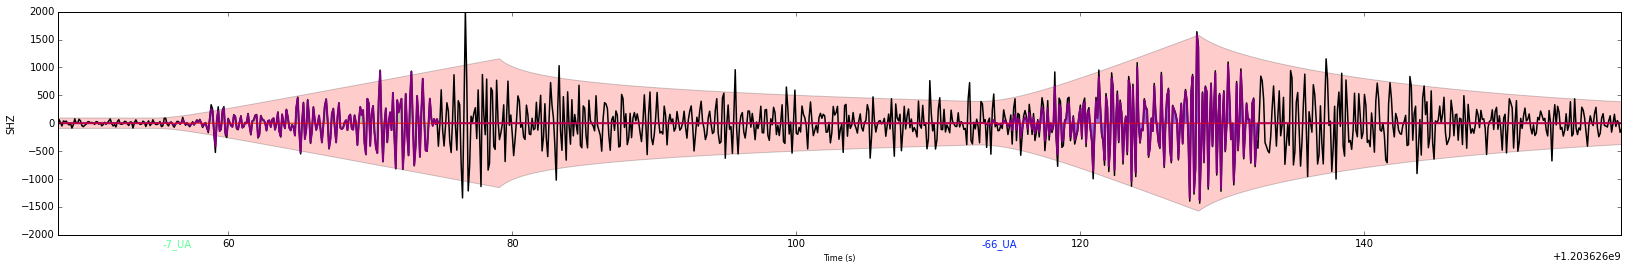

In [10]:

def plot_wn(wn, pred_atime):
    f = plt.figure(figsize=(28, 4))
    ax = f.add_subplot(111)
    
    xlim = (pred_atime-10.0, pred_atime+100.0)
    wn.plot(ax=ax, plot_pred=True, plot_atimes=True, plot_stddev=True, xlim=xlim)

    ax.set_ylim([-2000, 2000])
    
wn = sg.station_waves["NV01"][0]

target_evid = 1051106
target_ev = get_event(evid=target_evid)
#target_ev = Event(lon=-114.81 ,lat =41.17 , time= 1203628520.4, depth=1.6 , mb=2.8 )

pred_Pn_atime = tt_predict(target_ev, "NV01", "Pn") + target_ev.time
plot_wn(wn, pred_Pn_atime)

In [11]:
tmvals = sg.get_template_vals(-3, wn.sta, "UA", wn.band, wn.chan)
print tmvals

{'coda_height': 4.7906888621313906, 'arrival_time': 1203628104.3354816, 'coda_decay': -2.3470340112028634, 'peak_decay': -5.1351342848724322, 'peak_offset': 0.67535105643680415}


# Birth proposal

In [12]:
#print sg.current_log_p()
kill_uatemplates=False
if kill_uatemplates:
    sg.destroy_unassociated_template(tmid=1)
    sg.destroy_unassociated_template(tmid=2)
    sg.destroy_unassociated_template(tmid=3)

# first add the target event
evnodes = sg.add_event(target_ev, phases=None)
eid = evnodes["loc"].eid

    
# now get the unexplained signal
debug_info = {}
lqf, replicate_tmpls, birth_records = \
    ev_template_birth_helper(sg, eid,
                             associate_using_mb=False,
                             use_correlation=True,
                             repropose_uatemplates=True,
                             proposal_type="mh",
                             debug_info=debug_info)
sg._topo_sort()

proposal using correlation True
proposal using correlation True
proposal using correlation True
proposal using correlation True


{'wave_NV01_SHZ_freq_0.8_4.5_1203624942.0': {'Lg': (False, None, None), 'Pn': (True, 7, {'amp_transfer': 11.51564286130078, 'coda_decay': -4.2624712204693127, 'peak_offset': 3.1871309906672458, 'coda_height': 6.3513423296025104, 'arrival_time': 1203626054.8923719, 'tt_residual': -3.1411216493573662, 'peak_decay': -1.7233176919111106}), 'Pg': (False, None, None), 'Sn': (True, 66, {'amp_transfer': 10.967005238056467, 'coda_decay': -3.1744786833443226, 'peak_offset': 2.7583062998494396, 'coda_height': 6.6503761661160814, 'arrival_time': 1203626112.5796785, 'tt_residual': 9.0442284592399318, 'peak_decay': -2.4327091130105938})}, 'NVAR_phases': ['Lg', 'Pg', 'Pn', 'Sn']}
plotting uatemplate -1313 as color (0.22454142947501579, 1.0, 0.74320050600885512, 1.0)
plotting uatemplate -198 as color (0.0, 0.81764705882352939, 1.0, 1.0)
plotting uatemplate -1104 as color (0.0, 0.56666666666666665, 1.0, 1.0)
plotting uatemplate -348 as color (0.0, 0.34705882352941175, 1.0, 1.0)
plotting uatemplate -14 

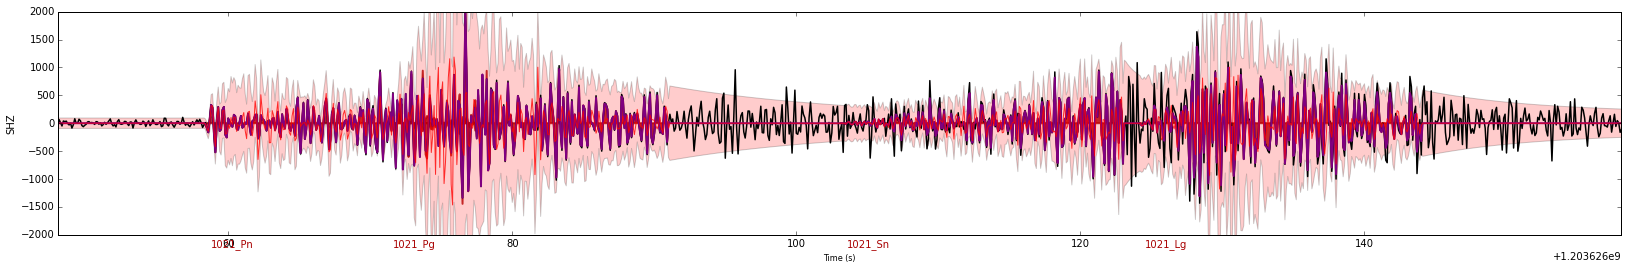

In [13]:
print birth_records
plot_wn(wn, pred_Pn_atime)

In [14]:
print lqf
a = sg.current_log_p_breakdown()

20.0721551972
n_uatemplate: -182.7
n_event: -66.4
ev priors: ev -11.6
ev observations: ev 0.0
phase existence: ev -0.0
tt_residual: ev -38.1
ev global cost (n + priors + phases + tt): -116.1
coda_decay: ev -24.5 ua -23.4 total -47.9
peak_decay: ev -37.5 ua -21.8 total -59.3
peak_offset: ev -26.3 ua -25.6 total -51.9
coda_height: ev -26.0 ua -36.6 total -62.6
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -114.3 ua -107.5 total -221.7
priors+params: ev -230.4 ua -290.2 total -520.5
station noise (observed signals): -226157.4
noise model prior lp: -9.0
overall: -226687.0
official: -226687.0



In [15]:
print wn.arrivals()

set([(12, 'Sn'), (-1313, 'UA'), (7, 'Pg'), (12, 'Lg'), (-198, 'UA'), (-1104, 'UA'), (49, 'Pg'), (-348, 'UA'), (-14, 'UA'), (-1, 'UA'), (-890, 'UA'), (-43, 'UA'), (-4, 'UA'), (1021, 'Pg'), (42, 'Pg'), (-2990, 'UA'), (7, 'Pn'), (-2491, 'UA'), (12, 'Pn'), (12, 'Pg'), (-3, 'UA'), (7, 'Sn'), (49, 'Pn'), (7, 'Lg'), (-676, 'UA'), (49, 'Sn'), (-135, 'UA'), (1021, 'Pn'), (1021, 'Lg'), (49, 'Lg'), (-2, 'UA'), (42, 'Sn'), (42, 'Lg'), (1021, 'Sn'), (42, 'Pn')])


In [16]:
lqb, replicate_untmpls, death_records = ev_template_death_helper(sg, eid, 
                                                                 fix_result=birth_records, 
                                                                 repropose_uatemplates=True)


In [17]:
print lqb

-42.1040324904


In [18]:
replicate_death, ev = ev_bare_death_move(sg, eid)
sg._topo_sort()

-226729.359876
plotting uatemplate -1313 as color (0.23719165085388991, 1.0, 0.73055028462998106, 1.0)
plotting uatemplate -198 as color (0.0, 0.0, 0.82085561497326198, 1.0)
plotting uatemplate -1104 as color (0.0, 0.83333333333333337, 1.0, 1.0)
plotting uatemplate -348 as color (0.40164452877925361, 1.0, 0.56609740670461739, 1.0)
plotting uatemplate -14 as color (0.0, 0.0, 0.553475935828877, 1.0)
plotting uatemplate -7 as color (0.0, 0.69215686274509802, 1.0, 1.0)
plotting uatemplate -1 as color (0.11068943706514844, 1.0, 0.85705249841872255, 1.0)
plotting uatemplate -890 as color (0.0, 0.049019607843137254, 1.0, 1.0)
plotting uatemplate -43 as color (0.0, 0.89607843137254906, 0.97090449082858954, 1.0)
plotting uatemplate -4 as color (0.0, 0.0, 0.87433155080213898, 1.0)
plotting uatemplate -66 as color (0.0, 0.0, 1.0, 1.0)
plotting uatemplate -2990 as color (0.0, 0.78627450980392133, 1.0, 1.0)
plotting uatemplate -2491 as color (0.0, 0.56666666666666665, 1.0, 1.0)
plotting uatemplate 

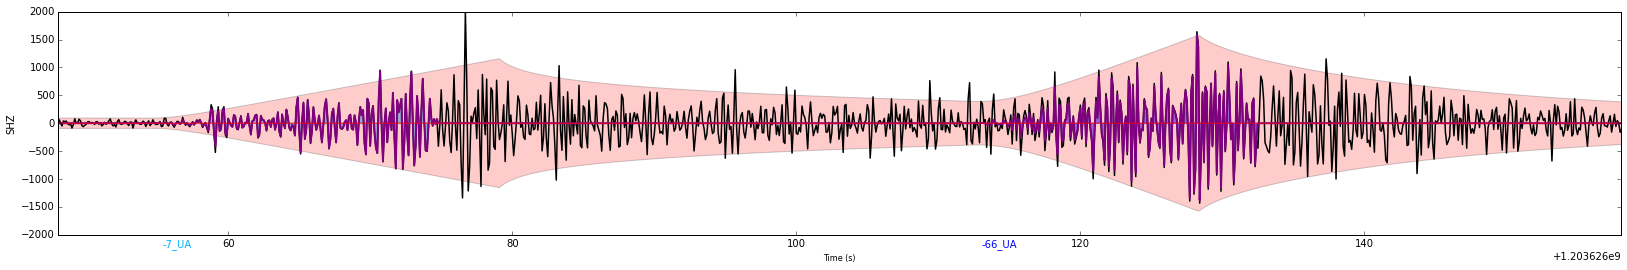

In [19]:
print sg.current_log_p()
plot_wn(wn, pred_Pn_atime)

In [12]:
tmvals = sg.get_template_vals(-3, wn.sta, "UA", wn.band, wn.chan)
print tmvals

{'coda_height': 8.116761769810946, 'arrival_time': 1203626381.8926065, 'coda_decay': -3.9381655753142026, 'peak_decay': -0.58625473892415059, 'peak_offset': 1.6308170520917389}


In [13]:


evnodes = sg.add_event(target_ev, eid=eid, phases=None)
replicate_tmpls()
sg._topo_sort()
print sg.current_log_p()


-13118.4349129


In [14]:
with open("birthed.sg", "wb") as f:
    pickle.dump(sg, f)

In [15]:
replicate_untmpls()
replicate_death()
sg._topo_sort()
a = sg.current_log_p_breakdown()

n_uatemplate: -23.5
n_event: -0.0
ev priors: ev 0.0
ev observations: ev 0.0
phase existence: ev 0.0
tt_residual: ev 0.0
ev global cost (n + priors + phases + tt): -0.0
coda_decay: ev 0.0 ua -4.7 total -4.7
peak_decay: ev 0.0 ua -10.8 total -10.8
peak_offset: ev 0.0 ua -11.9 total -11.9
coda_height: ev 0.0 ua -9.0 total -9.0
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev 0.0 ua -36.3 total -36.3
priors+params: ev -0.0 ua -59.9 total -59.9
station noise (observed signals): -12858.1
noise model prior lp: -10.5
overall: -12928.4
official: -12928.4



In [16]:
tmvals = sg.get_template_vals(-3, wn.sta, "UA", wn.band, wn.chan)
print tmvals

{'coda_height': 8.116761769810946, 'arrival_time': 1203626381.8926065, 'coda_decay': -3.9381655753142026, 'peak_decay': -0.58625473892415059, 'peak_offset': 1.6308170520917389}


# Death move

In [4]:
with open("birthed.sg", "rb") as f:
    sg = pickle.load(f)
a = sg.current_log_p_breakdown()

loading model 71214
loading model 71206
loading model 71198
loading model 71210
loading model 71202
loading model 71212
loading model 71204
loading model 71195
loading model 71208
loading model 71200
loading model 71211
loading model 71203
loading model 70978
loading model 71207
loading model 71199
loading model 71213
loading model 71205
loading model 71197
loading model 71209
loading model 71201
n_uatemplate: -7.9
n_event: -13.3
ev priors: ev 0.3
ev observations: ev 0.0
phase existence: ev -0.0
tt_residual: ev -31.5
ev global cost (n + priors + phases + tt): -44.4
coda_decay: ev -5.1 ua -1.5 total -6.7
peak_decay: ev -7.5 ua -7.1 total -14.7
peak_offset: ev -4.7 ua -7.3 total -12.0
coda_height: ev -7.2 ua -2.7 total -9.9
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -24.6 ua -18.6 total -43.2
priors+params: ev -69.0 ua -26.5 total -95.5
station noise (observed signals): -13012.4
noise model prior lp: -10.5
overall: -13118.4
official: -13118.4



In [5]:
eid=sg.evnodes.keys()[0]
lqb, replicate_untmpls, death_records = ev_template_death_helper(sg, eid, 
                                                                 fix_result=None, 
                                                                 repropose_uatemplates=True)
replicate_death, ev = ev_bare_death_move(sg, eid)
sg._topo_sort()

n_uatemplate: -23.5
n_event: -0.0
ev priors: ev 0.0
ev observations: ev 0.0
phase existence: ev 0.0
tt_residual: ev 0.0
ev global cost (n + priors + phases + tt): -0.0
coda_decay: ev 0.0 ua -4.8 total -4.8
peak_decay: ev 0.0 ua -16.1 total -16.1
peak_offset: ev 0.0 ua -14.2 total -14.2
coda_height: ev 0.0 ua -9.5 total -9.5
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev 0.0 ua -44.6 total -44.6
priors+params: ev -0.0 ua -68.1 total -68.1
station noise (observed signals): -14370.2
noise model prior lp: -10.5
overall: -14448.8
official: -14448.8

plotting uatemplate -4 as color (0.0, 0.29999999999999999, 1.0, 1.0)
plotting uatemplate -1 as color (0.0, 0.0019607843137254902, 1.0, 1.0)
plotting uatemplate -5 as color (0.034788108791903853, 0.94313725490196076, 0.93295382669196714, 1.0)
reading station detections... 


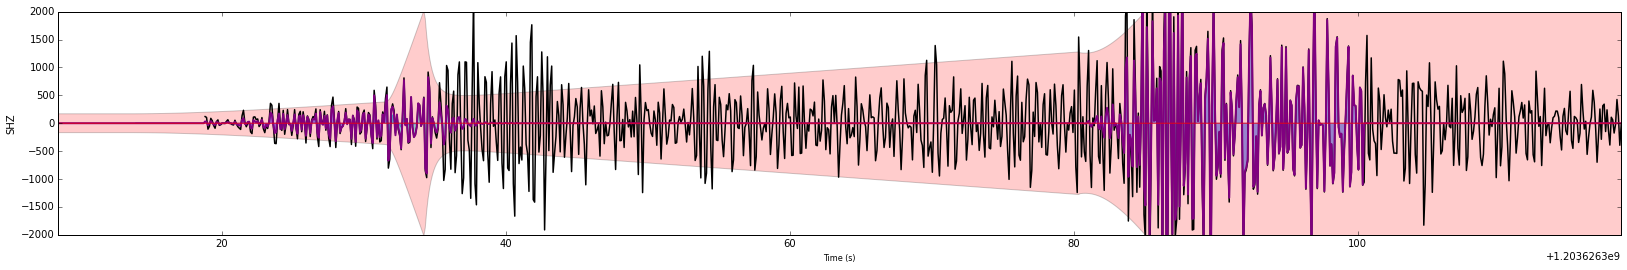

In [6]:
a = sg.current_log_p_breakdown()
wn = sg.station_waves["NV01"][0]
plot_wn(wn, pred_Pn_atime)

In [7]:
print death_records

{'wave_NV01_SHZ_freq_0.8_4.5_1203626298.8': {'Lg': {'amp_transfer': 12.564752516697556, 'coda_decay': -2.4051988196669809, 'peak_offset': 1.4690015126549694, 'coda_height': 7.805240723811222, 'arrival_time': 1203626382.3285787, 'tt_residual': 1.1770619288329323, 'peak_decay': -4.8007502586319051}, 'assoc_tmids': (4, 5, None, None), 'Pn': {'amp_transfer': 10.907257297400605, 'coda_decay': -3.212211522876296, 'peak_offset': -0.038842069573915047, 'coda_height': 5.2994910613823505, 'arrival_time': 1203626320.9878726, 'tt_residual': 2.4972207217686426, 'peak_decay': -4.2230995052784692}, 'Pg': {'amp_transfer': 12.930918154311078, 'coda_decay': -3.1354115344191191, 'peak_offset': 1.2356755224256128, 'coda_height': 7.3231519182928233, 'arrival_time': 1203626333.0132215, 'tt_residual': 4.1794215743023049, 'peak_decay': -1.1048813146680134}, 'Sn': {'amp_transfer': 10.507609921024871, 'coda_decay': -5.0602432616325173, 'peak_offset': -1.6059694618613574, 'coda_height': 5.7480981281385368, 'arri

In [8]:
evnodes = sg.add_event(ev, eid=eid, phases=None)

lqb, replicate_tmpls, birth_records = \
            ev_template_birth_helper(sg, eid,
                                     associate_using_mb=False,
                                     fix_result=death_records,
                                     use_correlation=True,
                                     repropose_uatemplates=True,
                                     proposal_type="mh")
sg._topo_sort()
a = sg.current_log_p_breakdown()

/home/dmoore/python/sigvisa/infer/event_birthdeath.py:1303: RuntimeWarning: divide by zero encountered in log
  assoc_lp = np.log(jd[assoc_tmids]) if assoc_tmids in jd else -np.inf
/home/dmoore/python/sigvisa/infer/event_birthdeath.py:485: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  tssm = TransientCombinedSSM(components, 1e-6)


proposal using correlation True
proposal using correlation True
proposal using correlation True
proposal using correlation True
n_uatemplate: -7.9
n_event: -13.3
ev priors: ev 0.3
ev observations: ev 0.0
phase existence: ev -0.0
tt_residual: ev -31.5
ev global cost (n + priors + phases + tt): -44.4
coda_decay: ev -5.1 ua -1.5 total -6.7
peak_decay: ev -7.5 ua -7.1 total -14.7
peak_offset: ev -4.7 ua -7.3 total -12.0
coda_height: ev -7.2 ua -2.7 total -9.9
mult_std_wiggle: ev 0.0 ua 0.0 total 0.0
coef jointgp: 0.0
total param: ev -24.6 ua -18.6 total -43.2
priors+params: ev -69.0 ua -26.5 total -95.5
station noise (observed signals): -13012.4
noise model prior lp: -10.5
overall: -13118.4
official: -13118.4



In [9]:
print death_records

{'wave_NV01_SHZ_freq_0.8_4.5_1203626298.8': {'Lg': {'amp_transfer': 12.564752516697556, 'coda_decay': -2.4051988196669809, 'peak_offset': 1.4690015126549694, 'coda_height': 7.805240723811222, 'arrival_time': 1203626382.3285787, 'tt_residual': 1.1770619288329323, 'peak_decay': -4.8007502586319051}, 'assoc_tmids': (4, 5, None, None), 'Pn': {'amp_transfer': 10.907257297400605, 'coda_decay': -3.212211522876296, 'peak_offset': -0.038842069573915047, 'coda_height': 5.2994910613823505, 'arrival_time': 1203626320.9878726, 'tt_residual': 2.4972207217686426, 'peak_decay': -4.2230995052784692}, 'Pg': {'amp_transfer': 12.930918154311078, 'coda_decay': -3.1354115344191191, 'peak_offset': 1.2356755224256128, 'coda_height': 7.3231519182928233, 'arrival_time': 1203626333.0132215, 'tt_residual': 4.1794215743023049, 'peak_decay': -1.1048813146680134}, 'Sn': {'amp_transfer': 10.507609921024871, 'coda_decay': -5.0602432616325173, 'peak_offset': -1.6059694618613574, 'coda_height': 5.7480981281385368, 'arri